In [19]:
import torch
from torch import nn, optim

def make_net(hidden_depth, width):
    assert hidden_depth >= 1
    yield nn.Linear(1, width)
    yield nn.ReLU()
    for i in range(hidden_depth-1):
        yield nn.Linear(width, width)
        yield nn.ReLU()
    yield nn.Linear(width, 1)


In [107]:
xr = (-2, 5)
xsize = (xr[1] - xr[0]) * 10 + 1

# xsize = (xr[1] - xr[0]) * 10 + 1
xt = torch.linspace(*xr, xsize).unsqueeze(-1)
yt = torch.exp(xt)
xd = xt.detach()
yd = yt.detach()
STR_NAME = f"exp:{xr[0]}:{xr[1]}"
def get_pred(hidden, width, nepoch=200, lr=0.002, momentum=0.9, debug=False):
    net = nn.Sequential(*make_net(hidden, width))
    lossfunc = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    data_out = torch.zeros(nepoch, xt.shape[0])
    loss_t = torch.zeros(nepoch)

    og_loss = lossfunc(net(xt), yt)
    for epoch in range(nepoch):
        optimizer.zero_grad()
        ypred = net(xt)
        
        
        loss = lossfunc(ypred, yt)

        
        if debug: print(epoch, loss)
        
        loss_t[epoch] = loss.item()
        data_out[epoch, :] = ypred.squeeze()
        
        loss.backward()
        optimizer.step()
    if debug: print(f"First loss {og_loss} v final {loss}")
    return data_out.detach(), loss_t.detach()

In [108]:
h, w = 2,5
nepoch = 400
data_np = [get_pred(h,w, nepoch)[0].numpy() for i in range(50)]

And Done


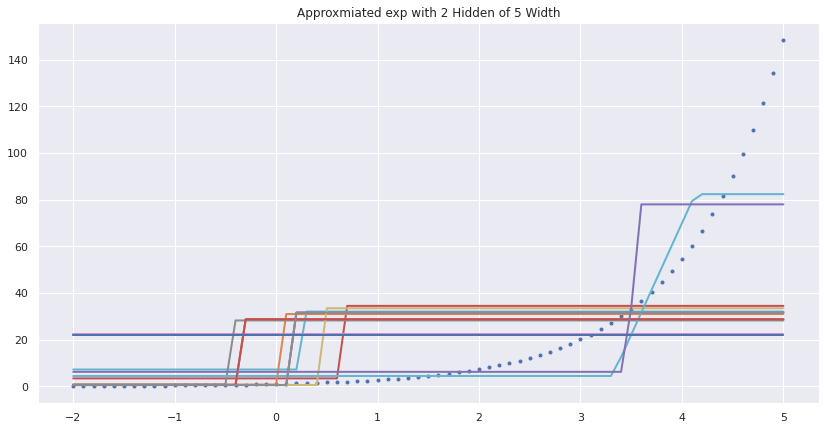

In [109]:
import numpy as np
import seaborn as sns
sns.set()

plt.rcParams["figure.figsize"] = (14.0, 7.0)
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

ax = plt.axes()
plt.title(f"Approxmiated exp with {h} Hidden of {w} Width")
ax.plot(xd, yd, ".")
line_ref = []
for i in range(len(data)):
    line, = ax.plot([], [], lw=2)
    line_ref.append(line)

    

# initialization function: plot the background of each frame
def init():
    for line in line_ref:
        line.set_data([], [])
    return line_ref


# animation function.  This is called sequentially
def animate(i):
#     print(i)
    for dnum, line in enumerate(line_ref):
        line.set_data(xd, data_np[dnum][i])
    return line_ref

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nepoch, interval=20, blit=True);

anim.save(f'training{h}h{w}w e:{nepoch} {STR_NAME}.mp4',  fps=30, extra_args=['-vcodec', 'libx264'])
print("And Done")